In [1]:
#Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Primeiro vejamos exemplos de como plotar graficos e visualizar dados 

In [2]:
# Podemos considerar esses dados abaixo
dados = pd.DataFrame({
    'X': [1,2,3,4,5],
    'Y': [1.3,1.8,3.5,4,4.6]
})

dados.head(2)

,X,Y
0,1,1.3
1,2,1.8


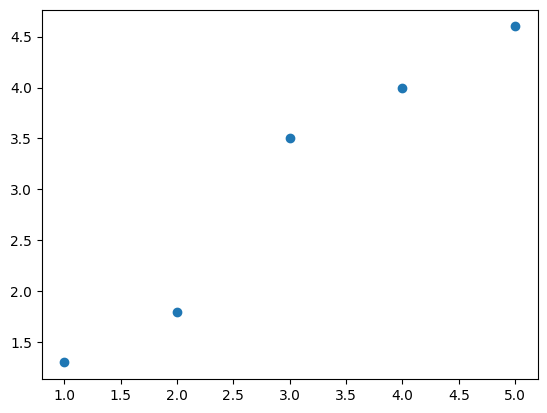

In [3]:
# Visualizando esses pontos graficamente, podemos traçar uma reta que passa por esses pontos
fig,ax = plt.subplots()

ax.scatter(dados.X, dados.Y)

plt.show()

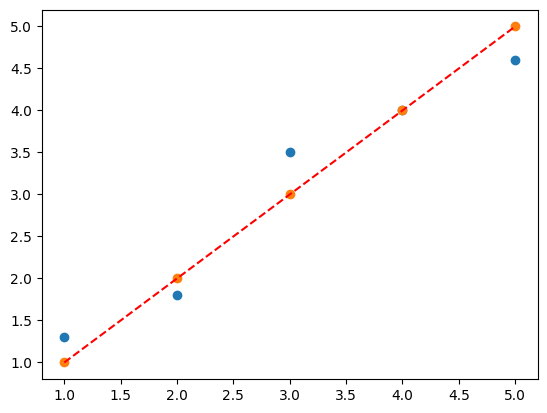

In [4]:
# Agora nessa reta vermelha, fizemos que y = x, então podemos escrever o y_reta como
dados['y_reta'] = dados.X

fig,ax = plt.subplots()

ax.scatter(dados.X, dados.Y)
ax.plot(dados.X, dados.y_reta, '--r')
ax.scatter(dados.X, dados.y_reta)

plt.show()

# Vamos agora aprender a criar nossa reta de Regressão Linear
- **Vamos usar a regressão linear para traçar a melhor reta que passa por esses pontos**
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [5]:
X_2D = dados.X.values.reshape(-1,1)
Y_2D = dados.Y.values.reshape(-1,1)

X_2D, Y_2D

(array([[1],
        [2],
        [3],
        [4],
        [5]]),
 array([[1.3],
        [1.8],
        [3.5],
        [4. ],
        [4.6]]))

In [7]:
# Criando nosso regressor
# reg = LinearRegression().fit(dados.X, dados.Y) # Aqui não funciona porque ele espera arrays 2D
reg = LinearRegression().fit(X_2D, Y_2D)

In [8]:
# Visualizando o coeficiente angular
reg.coef_
b = reg.coef_[0] 

In [9]:
# Visualizando o coeficiente linear
reg.intercept_
a = reg.intercept_[0]

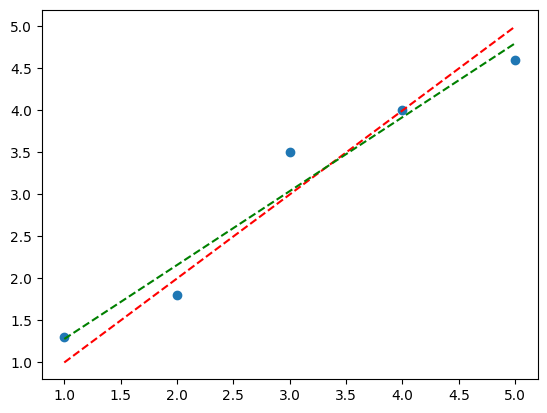

In [10]:
# Visualizando graficamente
x = dados.X.values

reta_reg = a+b*x  

fig,ax = plt.subplots()

ax.scatter(dados.X, dados.Y)
ax.plot(dados.X, dados.y_reta, '--r')
ax.plot(x,reta_reg, '--g')

plt.show()

In [11]:
# Fazendo a previsão e adicionando na base
dados['y_pred'] = reg.predict(X_2D)

In [14]:
dados

,X,Y,y_reta,y_pred,erro_reta,erro_pred
0,1,1.3,1,1.28,0.09,0.0004
1,2,1.8,2,2.16,0.04,0.1296
2,3,3.5,3,3.04,0.25,0.2116
3,4,4.0,4,3.92,0.00,0.0064
4,5,4.6,5,4.80,0.16,0.0400


In [13]:
# Calculando o erro da reta vermelha e da regressão
dados['erro_reta'] = (dados.Y - dados.y_reta)**2
dados['erro_pred'] = (dados.Y - dados.y_pred)**2

In [15]:
# Verificando essa base pela soma do erro e media do erro
print(dados[['erro_reta','erro_pred']].sum())
print(dados[['erro_reta','erro_pred']].mean())

erro_reta    0.540
erro_pred    0.388
dtype: float64
erro_reta    0.1080
erro_pred    0.0776
dtype: float64


- Podemos utilizar o erro médio absoluto e o erro médio quadrático do próprio scikit-learn para calcular esses erros
    - https://scikit-learn.org/stable/modules/classes.html#regression-metrics 

In [16]:
# bibliotecas de metricas
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
# Visualizando o resutlado da previsão
print(mean_absolute_error(dados.Y, dados.y_reta))
print(mean_squared_error(dados.Y, dados.y_reta))
print('Usando valor previsto:')
print(mean_absolute_error(dados.Y, dados.y_pred))
print(mean_squared_error(dados.Y, dados.y_pred))

0.2800000000000001
0.10800000000000005
Usando valor previsto:
0.22400000000000003
0.07760000000000003


# Usando a Regressão Linear de forma prática
 - Utilziando o dataset de casa da Califórnia
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [18]:
# Importando o dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [39]:
# Visualizando
df_casas = pd.DataFrame(housing.data)
df_casas.columns = housing.feature_names
df_casas['MedHouseVal'] = housing.target

In [40]:
df_casas

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [51]:
# Separando X e Y
X = df_casas.MedInc
y = df_casas.MedHouseVal

- **Separando nossa base em treino e teste para criarmos o modelo**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [52]:
# Seperando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1/3), random_state=42)

In [54]:
# Usando a regressão linear
reg = LinearRegression().fit(X_train.values.reshape(-1,1), y_train)

In [55]:
# Avaliando erro
y_pred = reg.predict(X_test.values.reshape(-1,1))

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.6277347073790304
0.7056170117382315


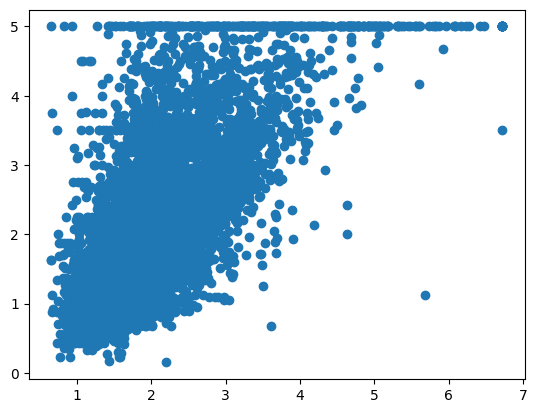

In [57]:
# Visualizando a relação do y_test com o y_pred
fig,ax = plt.subplots()

ax.scatter(y_pred, y_test)

plt.show()

- **Regressão Linear Múltipla**
  
- Primeiro com apenar duas variáveis

In [83]:
# Seprando x e Y
X = df_casas.drop(['MedHouseVal'], axis=1)
y = df_casas.MedHouseVal

In [84]:
# Seperando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1/3), random_state=42)

In [85]:
# Usando a regressão linear
reg = LinearRegression().fit(X_train, y_train)

In [86]:
# Da mesma forma, também vamos ter o coef_
reg.coef_

array([ 4.45222242e-01,  9.43110506e-03, -1.22067710e-01,  7.79316090e-01,
        3.47988934e-08, -3.29138453e-03, -4.19129845e-01, -4.33891546e-01])

In [87]:
# E o intercept_
reg.intercept_

-37.05474281396888

In [88]:
# Avaliando erro
y_pred = reg.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.5298679954551303
0.5375816014270145


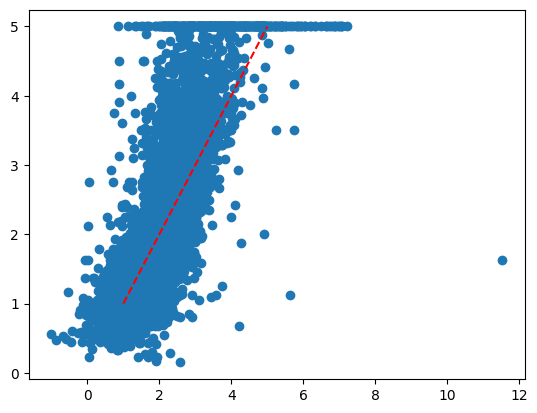

In [89]:
# Visualizando a relação do y_test com o y_pred
fig,ax = plt.subplots()

ax.scatter(y_pred, y_test)
ax.plot([1,5],[1,5], '--r')

plt.show()